In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading DataSet**

In [ ]:
df = pd.read_csv('/content/superstore sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Rawalpindi,Member,Female,Health and beauty,74.69,7,26.9800,548.9715,01/05/2019,13:08,Cash,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Islamabad,Non-Member,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Rawalpindi,Non-Member,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Rawalpindi,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Cash,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Rawalpindi,Non-Member,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Cash,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.380208,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.709627,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


## **What the data contains**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax            1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 101.7+ KB


### **Does data contains any NULL value?**

In [ ]:
df.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax              0
Total            0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [ ]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

**Cogs - cost of goods sold**

In [ ]:

df['gross margin percentage'].unique()

array([4.76190476])

In [ ]:
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross income,Rating
0,A,Rawalpindi,Member,Female,Health and beauty,74.69,7,26.9800,548.9715,Cash,522.83,26.1415,9.1
1,C,Islamabad,Non-Member,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Rawalpindi,Non-Member,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Rawalpindi,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Cash,465.76,23.2880,8.4
4,A,Rawalpindi,Non-Member,Male,Sports and travel,86.31,7,30.2085,634.3785,Cash,604.17,30.2085,5.3


# **Visualizations**


In [ ]:
print(df.shape)
df['Gender'].value_counts()


(1000, 13)


Female    501
Male      499
Name: Gender, dtype: int64

### **All the data on a single graph**

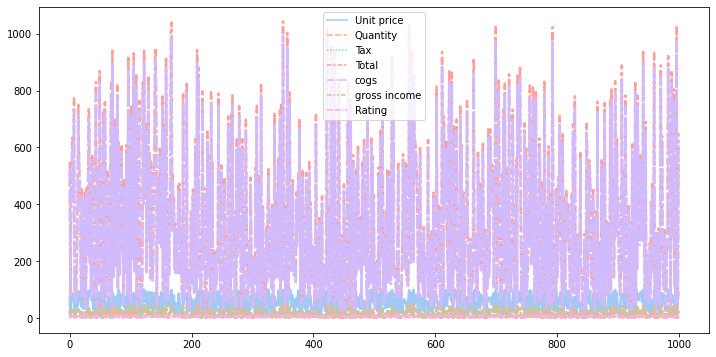

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data=df, palette="pastel", linewidth=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


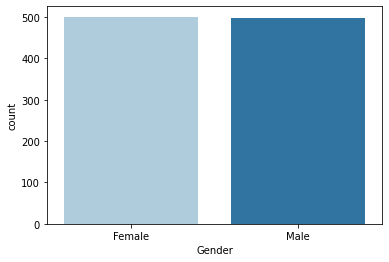

In [ ]:
sns.countplot('Gender' , data = df, palette="Paired")



In [ ]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df


,City
Rawalpindi,340
Lahore,332
Islamabad,328


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


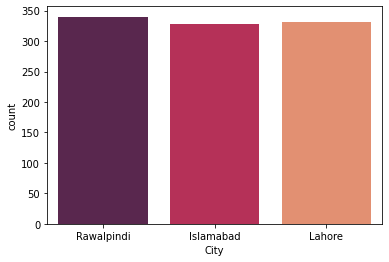

In [ ]:
sns.countplot('City' , data = df, palette="rocket")

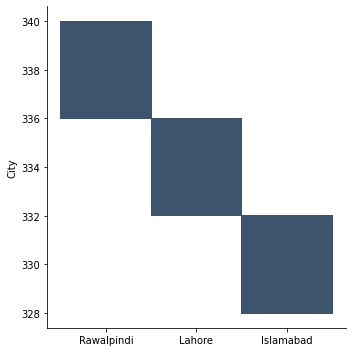

In [ ]:
sns.displot(x = place_df.index  , y = place_df['City'], palette = 'seagreen')

In [ ]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Cash,689
Credit card,311


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


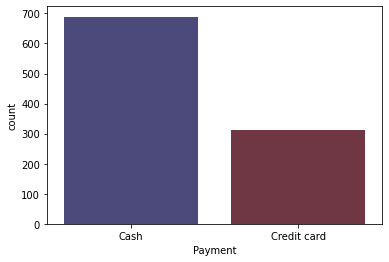

In [ ]:
sns.countplot('Payment' , data = df, palette="icefire")


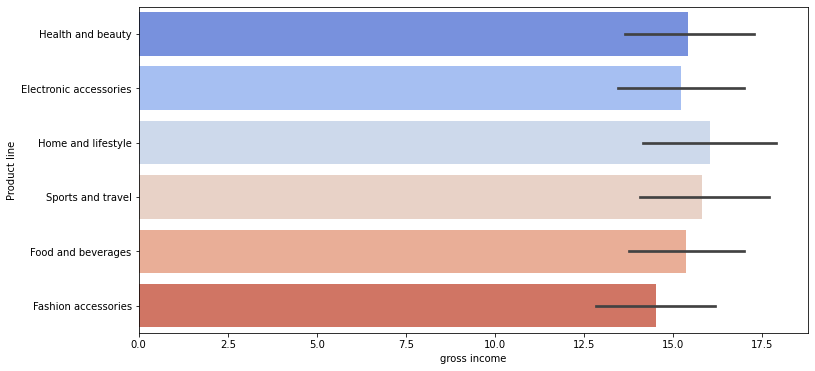

In [ ]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['gross income'], y = df['Product line'],palette="coolwarm")

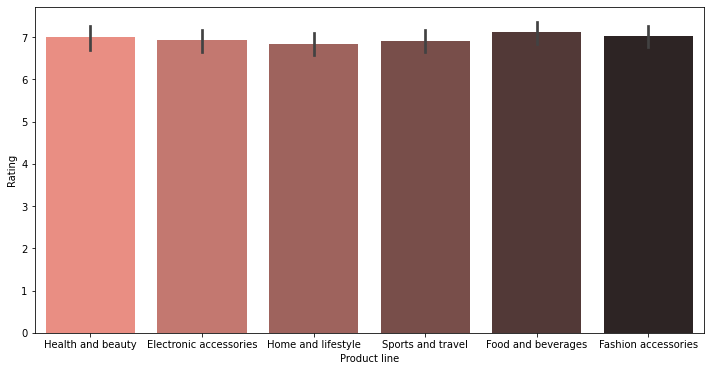

In [ ]:
data = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Rating'], x = df['Product line'],palette="dark:salmon_r")


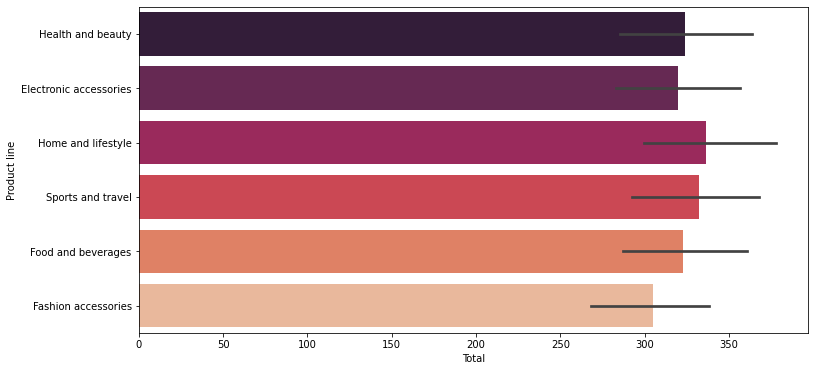

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'] , y = df['Product line'],palette="rocket")

In [ ]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df


,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


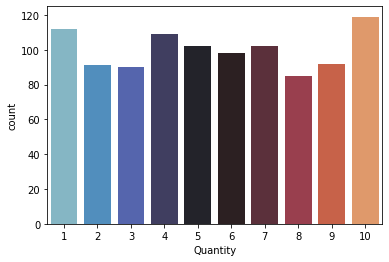

In [ ]:
sns.countplot('Quantity' , data = df, palette="icefire")


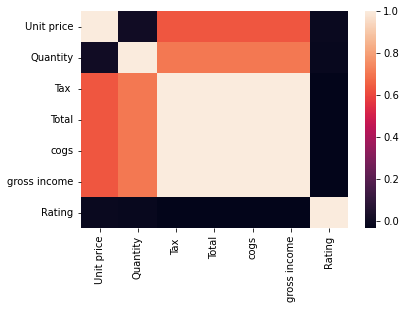

In [ ]:
sns.heatmap(df.corr())